# Lecture 4

# The story so far

* The proposed elimination procedure can be implemented using numerical rootfinding methods
* Elimination may be unstable in finite-precision arithmetic

> Can we tackle the system directly?

# Contents

* Newton's method in multiple variables
* Dealing with non-invertible systems
* Computational efficiency


# Newton in multiple variables

> Given $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ ($m$ equations in $n$ unknowns), how do we find a root?


Newton's method in multiple variables reads

$$x_{k+1} = x_k - Df(x_k)^{-1}f(x_k),$$

with $Df : \mathbb{R}^{n} \rightarrow \mathbb{R}^{m\times n}$ is the Jacobian of $f$. It has quadratic convergence when starting close to a root.

(-2.0, 2.0)

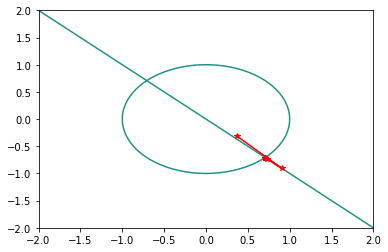

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# (x1^2 + x2^2 - 1), (x1 + x2), solutions 
f  = lambda x : np.array([x[0]**2 + x[1]**2 - 1, x[0]+x[1]])
Df = lambda x : np.array([[2*x[0], 2*x[1]],[1, 1]])

# Newton
niter = 10
X = np.zeros((niter,2))
X[0] = np.random.randn(2)
for k in range(niter-1):
    X[k+1] = X[k] - np.linalg.inv(Df(X[k]))@f(X[k])
    
# plot
x1,x2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
plt.plot(X[:,0],X[:,1],'r-*')
plt.contour(x1,x2,x1**2 + x2**2 - 1,0)
plt.contour(x1,x2,x1+x2,0)
plt.xlim([-2,2])
plt.ylim([-2,2])

(-2.0, 2.0)

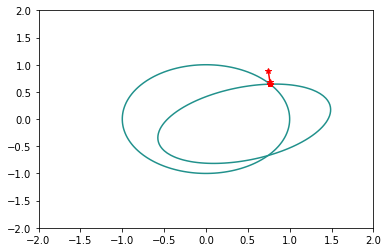

In [20]:
# (x1^2 + x2^2 - 1), (x1 + x2), solutions 
f  = lambda x : np.array([x[0]**2 + x[1]**2 - 1, (x[0]-.5)**2 + 2*(x[1] + .2)**2 - x[0]*x[1]-1])
Df = lambda x : np.array([[2*x[0], 2*x[1]],[2*(x[0]-.5)-x[1], 4*(x[1] + .2)-x[0]]])

# Newton
niter = 20
X = np.zeros((niter,2))
X[0] = np.random.randn(2)
for k in range(niter-1):
    X[k+1] = X[k] - np.linalg.inv(Df(X[k]))@f(X[k])
    
# plot
x1,x2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
plt.plot(X[:,0],X[:,1],'r-*')
plt.contour(x1,x2,x1**2 + x2**2 - 1,0)
plt.contour(x1,x2,(x1-.5)**2 + 2*(x2 + .2)**2 - x1*x2-1,0)
plt.xlim([-2,2])
plt.ylim([-2,2])

(-2.0, 2.0)

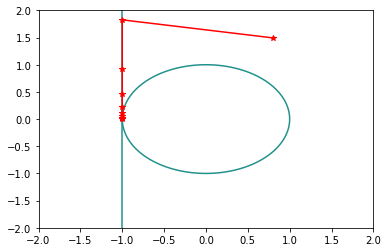

In [21]:
# (x1^2 + x2^2 - 1), (x1 + 1), solutions 
f  = lambda x : np.array([x[0]**2 + x[1]**2 - 1, x[0]+1])
Df = lambda x : np.array([[2*x[0], 2*x[1]],[1, 0]])

# Newton
niter = 10
X = np.zeros((niter,2))
X[0] = np.random.randn(2)
for k in range(niter-1):
    X[k+1] = X[k] - np.linalg.inv(Df(X[k]))@f(X[k])
    
# plot
x1,x2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
plt.plot(X[:,0],X[:,1],'r-*')
plt.contour(x1,x2,x1**2 + x2**2 - 1,0)
plt.contour(x1,x2,x1+1,0)
plt.xlim([-2,2])
plt.ylim([-2,2])

# Inverting a matrix

> How do we invert the Jacobian at teach step?

# Dealing with non-invertible systems

> What to do when we have more / less equations than unknowns?

## The pseudo-inverse

The Moore-Penrose pseudo-inverse of a matrix $A$ is the unique matrix $A^\dagger$ satisfying:

1. $AA^\dagger A = A$
2. $A^\dagger A A^\dagger = A^\dagger$
3. $AA^\dagger$ is Hermitian
4. $A^\dagger A$ is Hermitian

Two special cases:

* $A^\dagger = (A^*\!A)^{-1}A^*$ when $A^*\!A$ is invertible (left inverse)
* $A^\dagger = A^*(A\!A^*)^{-1}$ when $A\!A^*$ is invertible (right inverse)



We can compute the pseudo-inverse generally through the singular value decomposition:

$$A = U\Sigma V^*,$$

$$A^\dagger = V_k \Sigma_k^{-1} U_k^*,$$

with $k$ the rank of $A$.

(-2.0, 2.0)

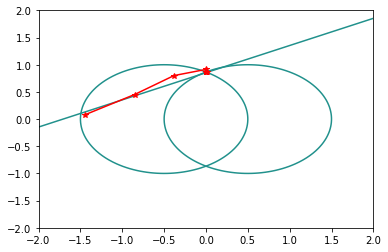

In [16]:
# overdetermined
# x1^2 + x2^2 = 1

f  = lambda x : np.array([(x[0]-.5)**2 + x[1]**2 - 1, (x[0]+.5)**2 + x[1]**2 - 1, x[0] - 2*x[1]+1+np.sqrt(2)/2])
Df = lambda x : np.array([[2*(x[0]-0.5), 2*x[1]],[2*(x[0]+0.5), 2*x[1]],[1,-2]])

# Newton
niter = 10
X = np.zeros((niter,2))
X[0] = np.random.randn(2)
for k in range(niter-1):
    X[k+1] = X[k] - np.linalg.pinv(Df(X[k]))@f(X[k])
    
# plot
x1,x2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
plt.plot(X[:,0],X[:,1],'r-*')
plt.contour(x1,x2,(x1-.5)**2 + x2**2 - 1,0)
plt.contour(x1,x2,(x1+.5)**2 + x2**2 - 1,0)
plt.contour(x1,x2,x1-2*x2+1+np.sqrt(2)/2,0)
plt.xlim([-2,2])
plt.ylim([-2,2])

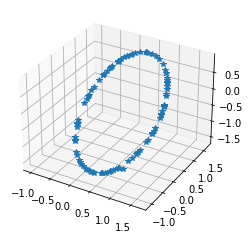

In [45]:
# underdetermined
# x1^2 + x2^2 + x3^2 - 3, x1 + x2 - x3 - 1; infintely many solutions
f  = lambda x : np.array([x[0]**2 + x[1]**2 + x[2]**2 - 3, x[0] + x[1] - x[2] - 1])
Df = lambda x : np.array([[2*x[0], 2*x[1], 2*x[2]],[1, 1, -1]])

# Newton
roots = np.zeros((100,3))
for i in range(100):
    niter = 10
    X = np.zeros((niter,3))
    X[0] = np.random.randn(3)
    for k in range(niter-1):
        X[k+1] = X[k] - np.linalg.pinv(Df(X[k]))@f(X[k])
    roots[i] = X[-1]
ax = plt.figure().add_subplot(projection='3d')
ax.plot(roots[:,0],roots[:,1],roots[:,2],'*')

# Computational efficiency

# Summary